In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Exploration
### Read Data

In [2]:
df=pd.read_csv("zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

DESCRIPTION OF FEATURES
-------------------------------------------------------------------------------
- 'url'    - contains the url of the restaurant in the zomato website 
- 'address'- contains the address of the restaurant in Bengaluru
- 'name'   - contains the name of the restaurant
- 'online_order' - whether online ordering is available in the restaurant or not
- 'book_table' - table book option available or not
- 'rate'       - contains the overall rating of the restaurant out of 5
- 'votes'      - contains total number of rating for the restaurant
- 'phone'      - contains the phone number of the restaurant
- 'location'   - contains the neighborhood in which the restaurant is located
- 'rest_type'  - restaurant type
- 'dish_liked' - Most liked dishes in the restaurant
- 'cuisines'   - Cuisines served by the restaurant
- 'approx_cost(for two people)' - Approximate cost for 2 persons
- 'reviews_list' - Reviews by the customers 
- 'menu_item'   - Menu list from the restaurant
- 'listed_in(type)' - Category of the restaurant
- 'listed_in(city)' - City where the restaurant is situated '''

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.shape

(51717, 17)

In [7]:
df.describe(include='all')

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning
### 1. Deleting Reduntant & Unnecessary Columns

In [8]:
df=df.drop(['url','address','phone','reviews_list','menu_item'],axis=1)

In [9]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


### 2. Renaming the Columns

In [10]:
df.rename(columns={'approx_cost(for two people)':'Cost_2_persons','rest_type':'restaurant_type','listed_in(type)':'Type','listed_in(city)':'city'},inplace=True)

In [11]:
df.head(2)

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,Cost_2_persons,Type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari


### 3. Droping Duplicates

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(51609, 12)

In [15]:
df.reset_index(drop=True,inplace=True)

In [16]:
df.tail(3)

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,Cost_2_persons,Type,city
51606,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51607,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield
51608,The Nest - The Den Bengaluru,No,No,3.4 /5,13,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500",Pubs and bars,Whitefield


# Cleaning Individual Columns
## Cleaning 'rate' coloumn
#### Repalcing NEW and '-' with nan value

In [17]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
def rating(value):
    '''This function replaces 'NEW' and '-' with NaN value in the rate column'''
    if (value == 'NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

df['rate']=df['rate'].apply(rating)

In [19]:
df['rate']=df['rate'].round(1)

In [20]:
df

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,Cost_2_persons,Type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51604,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51605,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51606,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51607,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [21]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

## Filling NaN values with mean of Rate column

In [22]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51609 entries, 0 to 51608
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51609 non-null  object 
 1   online_order     51609 non-null  object 
 2   book_table       51609 non-null  object 
 3   rate             51609 non-null  float64
 4   votes            51609 non-null  int64  
 5   location         51588 non-null  object 
 6   restaurant_type  51382 non-null  object 
 7   dish_liked       23595 non-null  object 
 8   cuisines         51564 non-null  object 
 9   Cost_2_persons   51265 non-null  object 
 10  Type             51609 non-null  object 
 11  city             51609 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.7+ MB


## Removing rows which has null values

In [24]:
# dish_liked column is more than 50% null values. So dropping that column
df.drop('dish_liked',axis=1,inplace=True)

In [25]:
df.dropna(inplace=True)

In [26]:
df.reset_index(drop=True,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51042 entries, 0 to 51041
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51042 non-null  object 
 1   online_order     51042 non-null  object 
 2   book_table       51042 non-null  object 
 3   rate             51042 non-null  float64
 4   votes            51042 non-null  int64  
 5   location         51042 non-null  object 
 6   restaurant_type  51042 non-null  object 
 7   cuisines         51042 non-null  object 
 8   Cost_2_persons   51042 non-null  object 
 9   Type             51042 non-null  object 
 10  city             51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


In [28]:
df.tail()

,name,online_order,book_table,rate,votes,location,restaurant_type,cuisines,Cost_2_persons,Type,city
51037,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51038,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51039,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51040,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield
51041,The Nest - The Den Bengaluru,No,No,3.400000,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental","1,500",Pubs and bars,Whitefield


### Converting 'Cost_2_Persons' column from string to float64 datatype.

In [29]:
df['Cost_2_persons'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [30]:
df['Cost_2_persons']=df['Cost_2_persons'].str.replace(',','').astype('float64')

In [31]:
df.dtypes

name                object
online_order        object
book_table          object
rate               float64
votes                int64
location            object
restaurant_type     object
cuisines            object
Cost_2_persons     float64
Type                object
city                object
dtype: object

In [32]:
df.tail()

,name,online_order,book_table,rate,votes,location,restaurant_type,cuisines,Cost_2_persons,Type,city
51037,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield
51038,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,Whitefield
51039,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars,Whitefield
51040,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars,Whitefield
51041,The Nest - The Den Bengaluru,No,No,3.400000,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental",1500.0,Pubs and bars,Whitefield


In [33]:
df['restaurant_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: restaurant_type, Length: 93, dtype: int64

In [34]:
df['Type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type, dtype: int64

In [35]:
df.describe()

,rate,votes,Cost_2_persons
count,51042.000000,51042.000000,51042.000000
mean,3.701424,284.507700,555.782983
std,0.395197,805.927478,439.293333
min,1.800000,0.000000,40.000000
25%,3.500000,7.000000,300.000000
50%,3.700142,41.000000,400.000000
75%,3.900000,199.000000,700.000000
max,4.900000,16832.000000,6000.000000


### Cleaning Cuisines Column

In [36]:
cc=df['cuisines'].value_counts(ascending=False)
cc100=cc[cc<100]
def cuisine_handler(x):
    '''This function checks if the cuisine is available in less than 100 restaurants (cc100), it saves to 'Others'.'''
    if x in cc100:
        return 'Others'
    else:
        return x
df['cuisines']=df['cuisines'].apply(cuisine_handler)
df['cuisines'].value_counts()

Others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [37]:
df.head()

,name,online_order,book_table,rate,votes,location,restaurant_type,cuisines,Cost_2_persons,Type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",Others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Others,600.0,Buffet,Banashankari


# DATA VISUALISATION

## Count Plots for different Columns

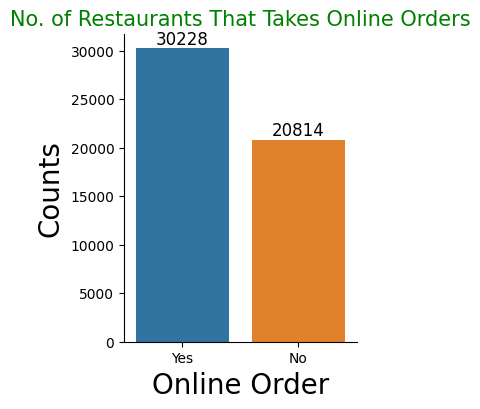

In [38]:
plt.figure(figsize=(3,4))
location=sns.countplot(x='online_order',data=df,order=df['online_order'].value_counts(ascending=False).index)
location.bar_label(location.containers[0],fontsize=12)

plt.title('No. of Restaurants That Takes Online Orders',fontsize=15,color='green')
plt.xlabel('Online Order',fontsize=20)
plt.ylabel('Counts',fontsize=20)
sns.despine()


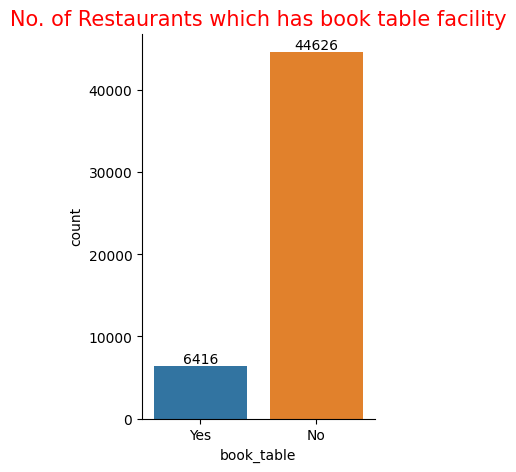

In [39]:
plt.figure(figsize=(3,5))
cuisine=sns.countplot(x='book_table',data=df,order=df['book_table'].value_counts(ascending=True).index)
cuisine.bar_label(cuisine.containers[0],fontsize=10)
plt.title('No. of Restaurants which has book table facility',fontsize=15,color='red',loc='center')

sns.despine()

#### Correlation between numerical columns

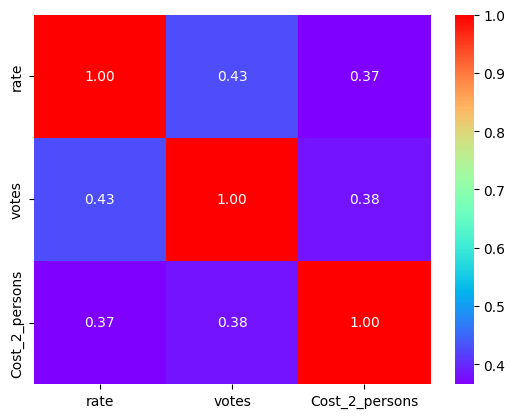

In [40]:
ax=sns.heatmap(df.corr(),annot=True,cmap='rainbow',fmt='.2f')

plt.show()

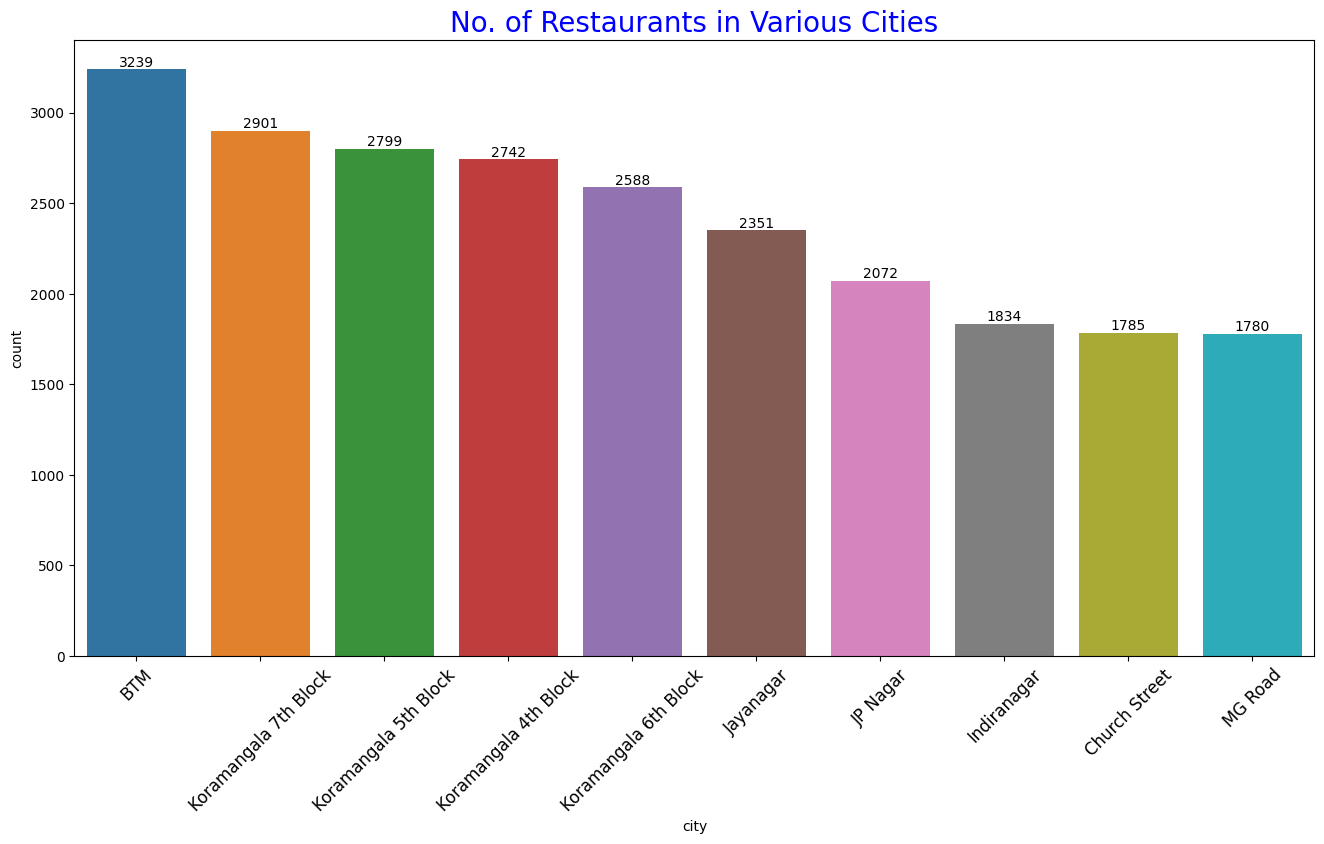

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize=(16,8))
ax=sns.countplot(x='city',data=df,order=df['city'].value_counts(ascending=False).index[:10])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45,fontsize=12)
plt.title('No. of Restaurants in Various Cities',fontsize=20,color='blue')
plt.show()
sns.despine()

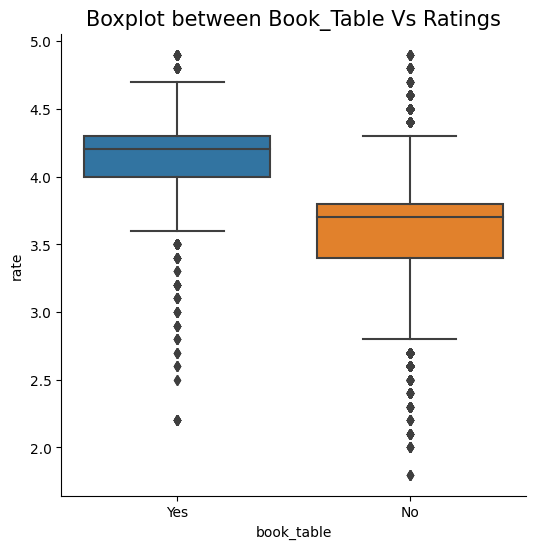

In [42]:
plt.figure(figsize=(6,6))
ax=sns.boxplot(x='book_table',y='rate',data=df)
plt.title('Boxplot between Book_Table Vs Ratings',fontsize=15)
sns.despine()

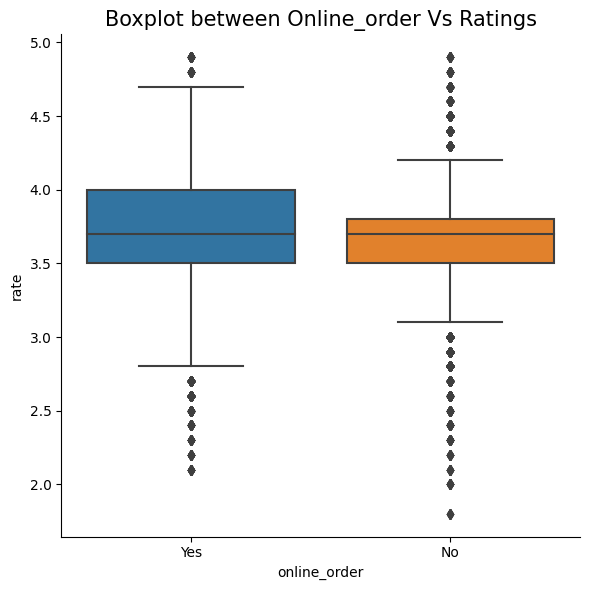

In [43]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)
plt.title('Boxplot between Online_order Vs Ratings',fontsize=15)
plt.tight_layout()
sns.despine()

## Best Location

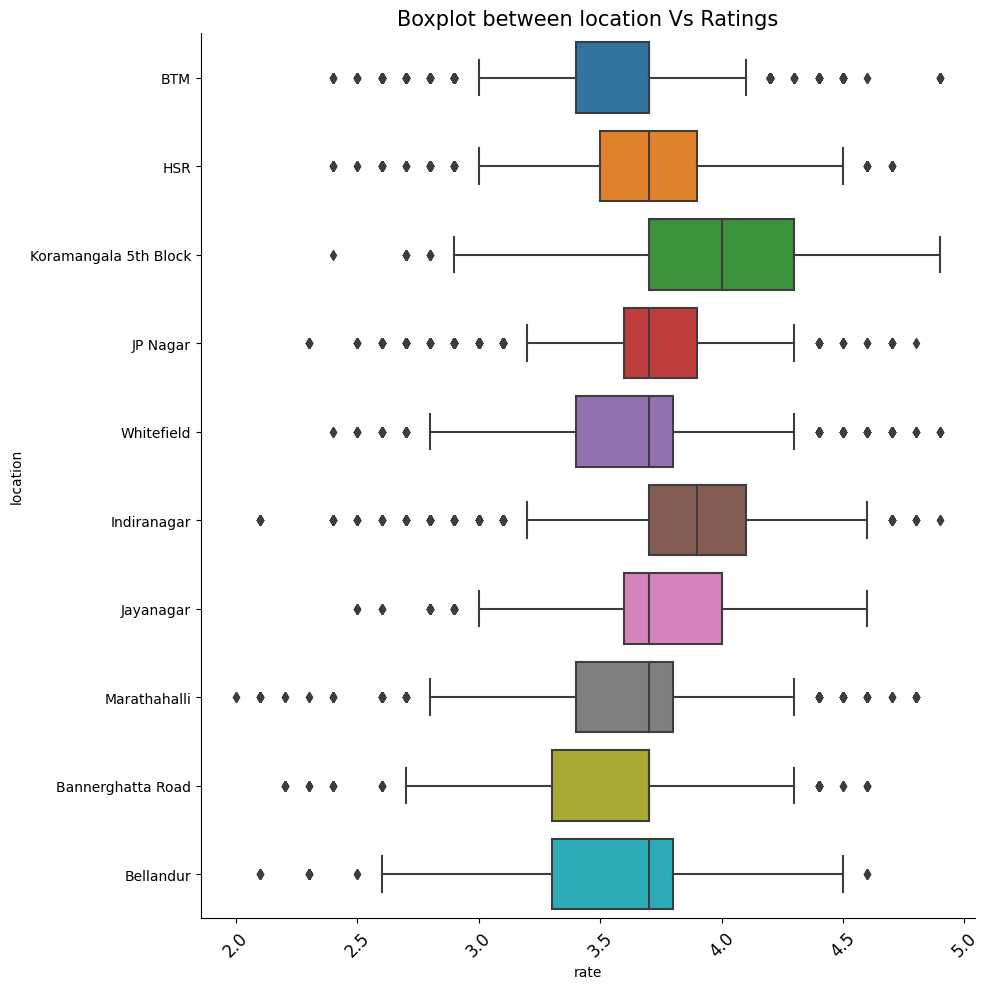

In [44]:
plt.figure(figsize=(10,10))
sns.boxplot(x='rate',y='location',data=df,order=df['location'].value_counts(ascending=False).index[:10])
plt.title('Boxplot between location Vs Ratings',fontsize=15)
plt.xticks(rotation=45,fontsize=12)
plt.tight_layout()
sns.despine()

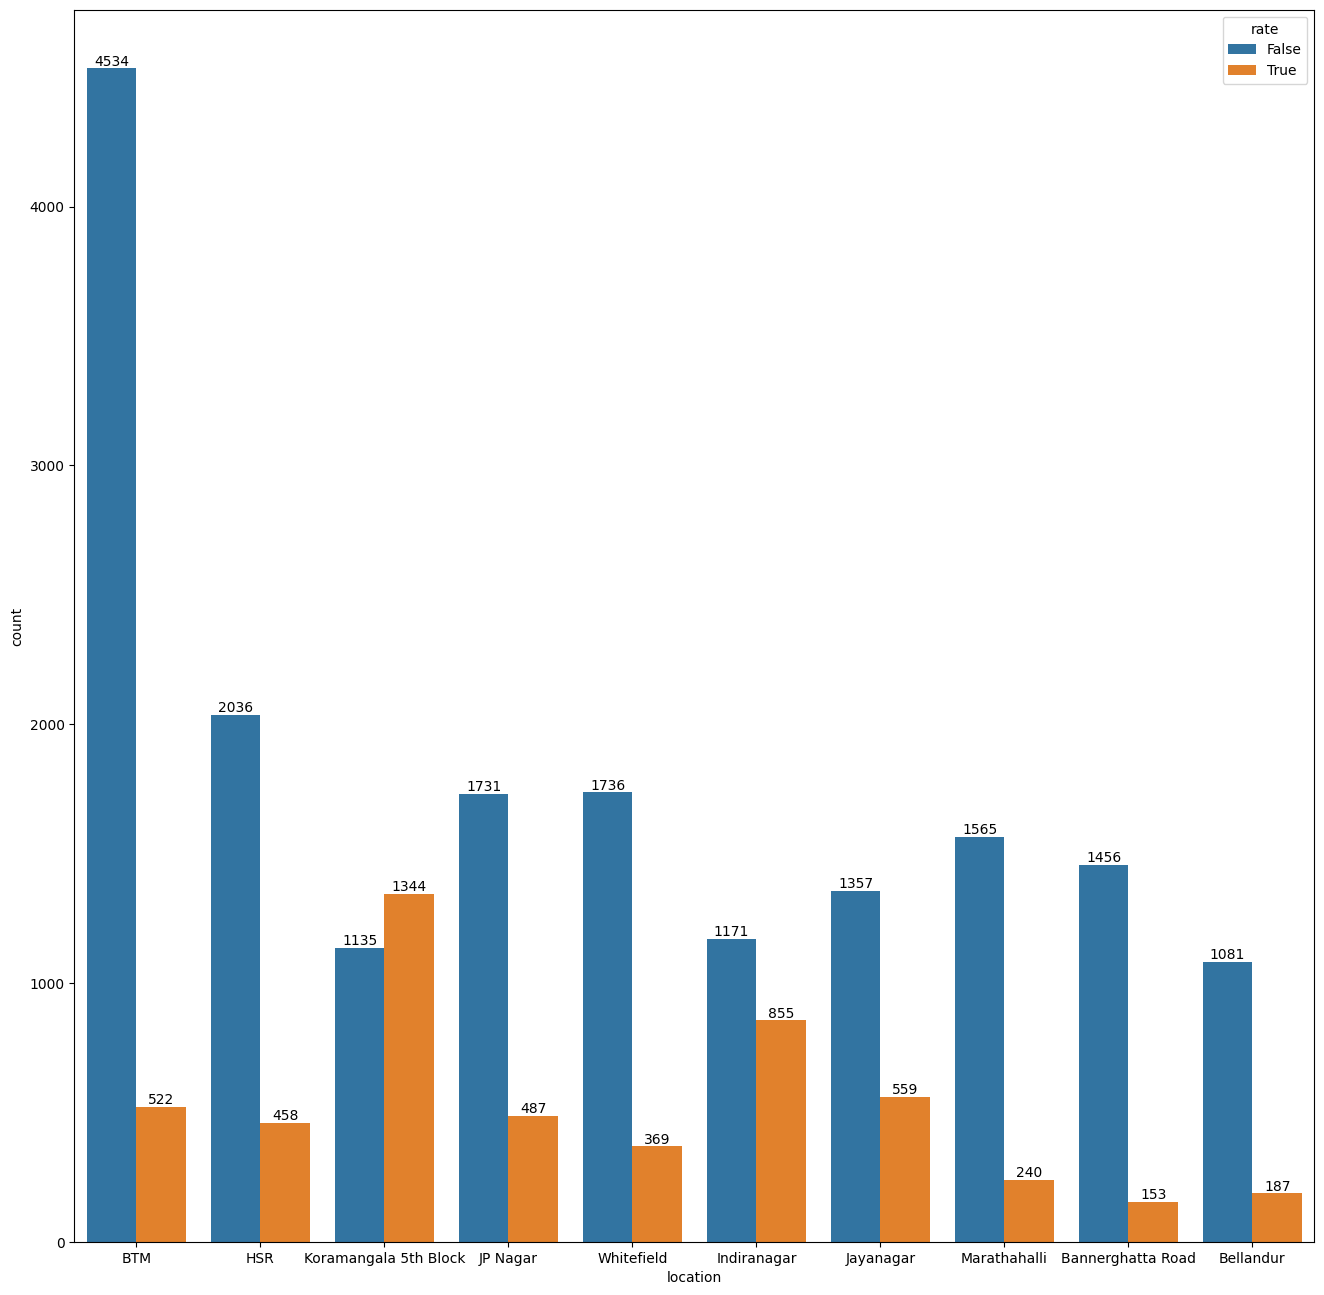

In [45]:
plt.figure(figsize=(16,16))
loc_rate=sns.countplot(x=(df['location']),hue=(df['rate']>=4),order=df['location'].value_counts(ascending=False).index[:10])
loc_rate.bar_label(loc_rate.containers[0])
loc_rate.bar_label(loc_rate.containers[1])

plt.show()

From the above countplot and boxplot between ratings and location, it is observed that koramangala 5th block is best location. since it has more ratings above 4.

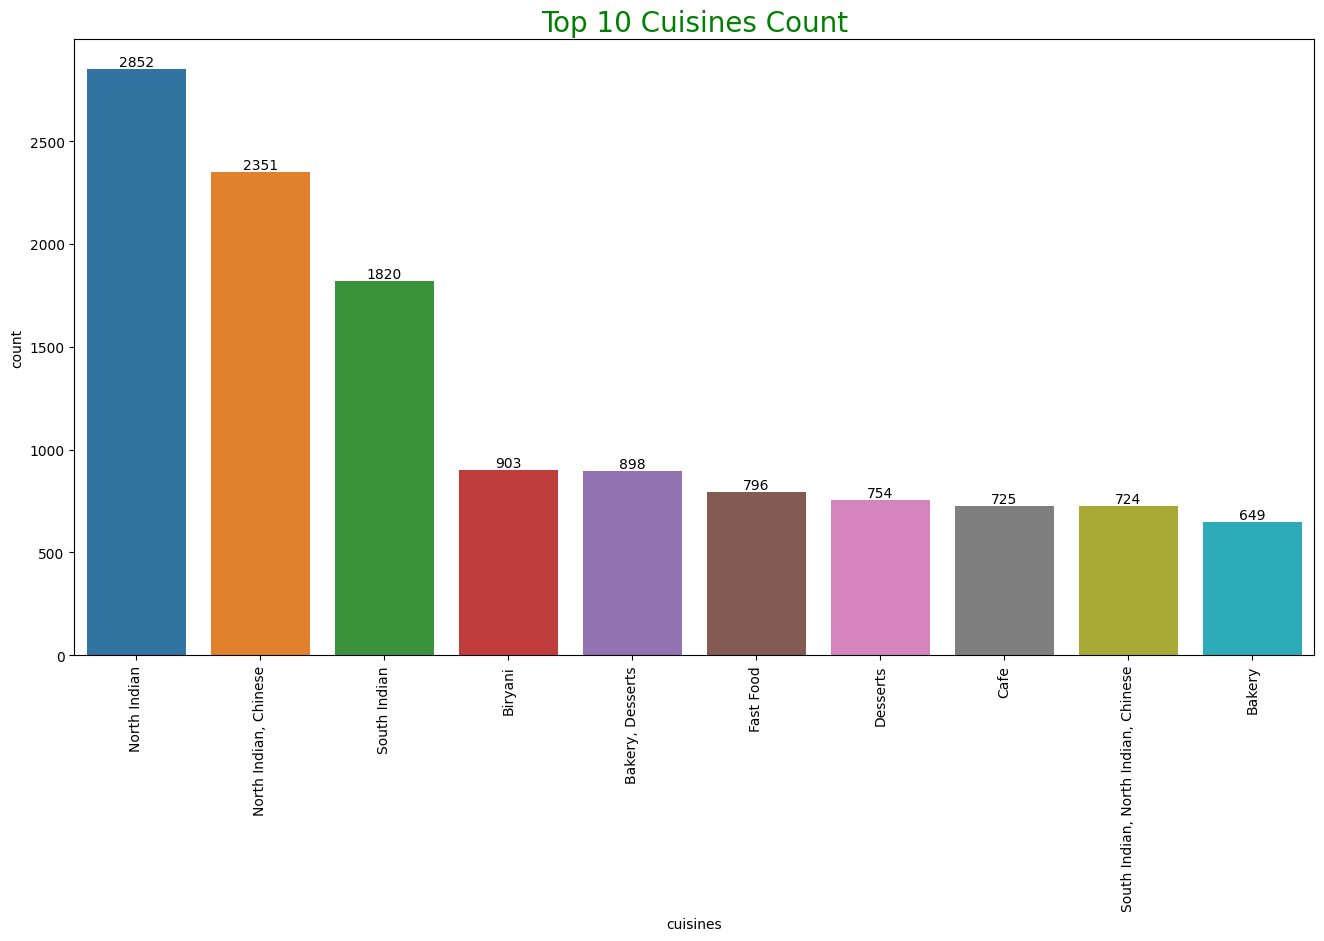

In [46]:
plt.figure(figsize=(16,8))
cuis=sns.countplot(x='cuisines',data=df,order=df['cuisines'].value_counts(ascending=False).index[1:11])
cuis.bar_label(cuis.containers[0])
plt.title('Top 10 Cuisines Count',fontsize=20,color='green')
plt.xticks(rotation=90,fontsize=10)
plt.show()

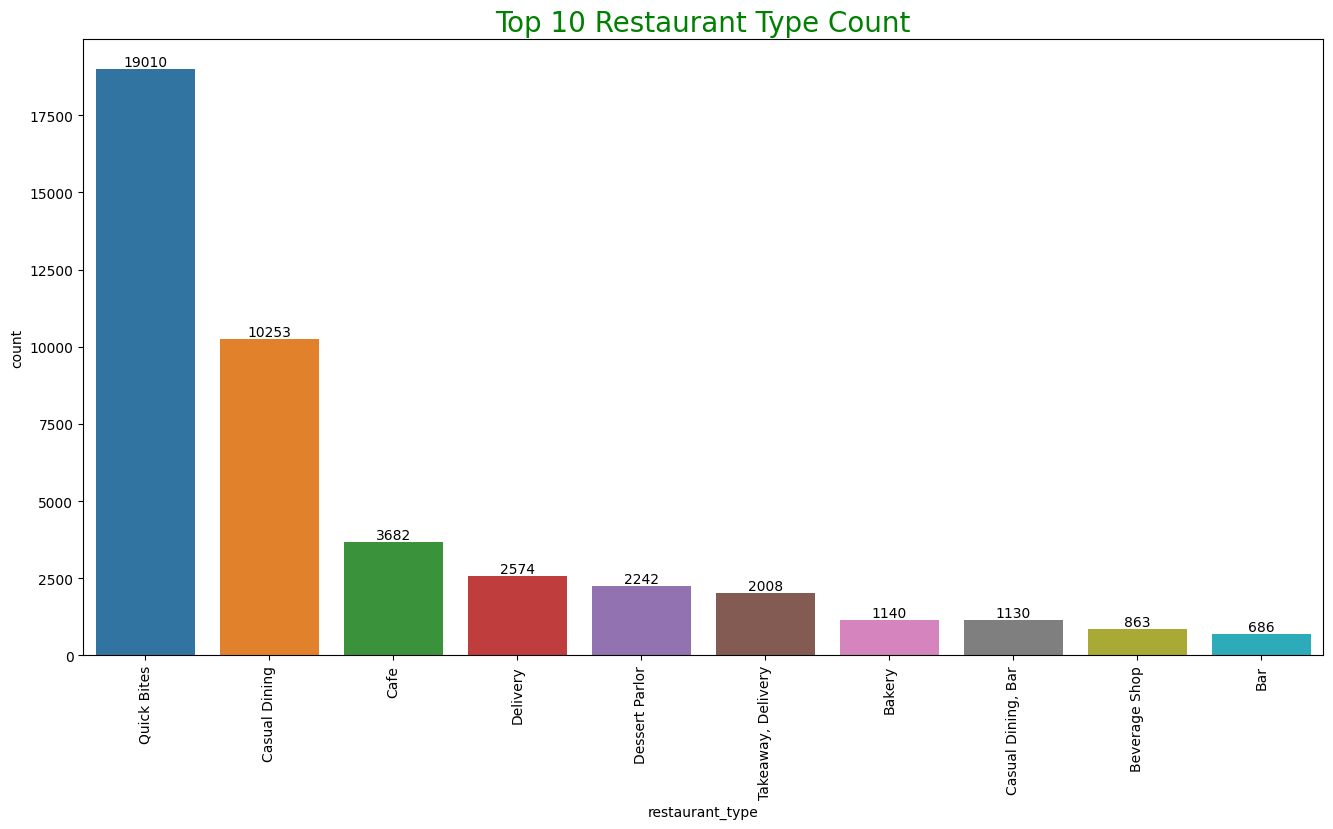

In [47]:
plt.figure(figsize=(16,8))
cuis=sns.countplot(x='restaurant_type',data=df,order=df['restaurant_type'].value_counts(ascending=False).index[:10])
cuis.bar_label(cuis.containers[0])
plt.title('Top 10 Restaurant Type Count',fontsize=20,color='green')
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [48]:
#df['online_order'] = df['online_order'].map(dict(Yes=1, No=0))


In [49]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'restaurant_type', 'cuisines', 'Cost_2_persons', 'Type', 'city'],
      dtype='object')

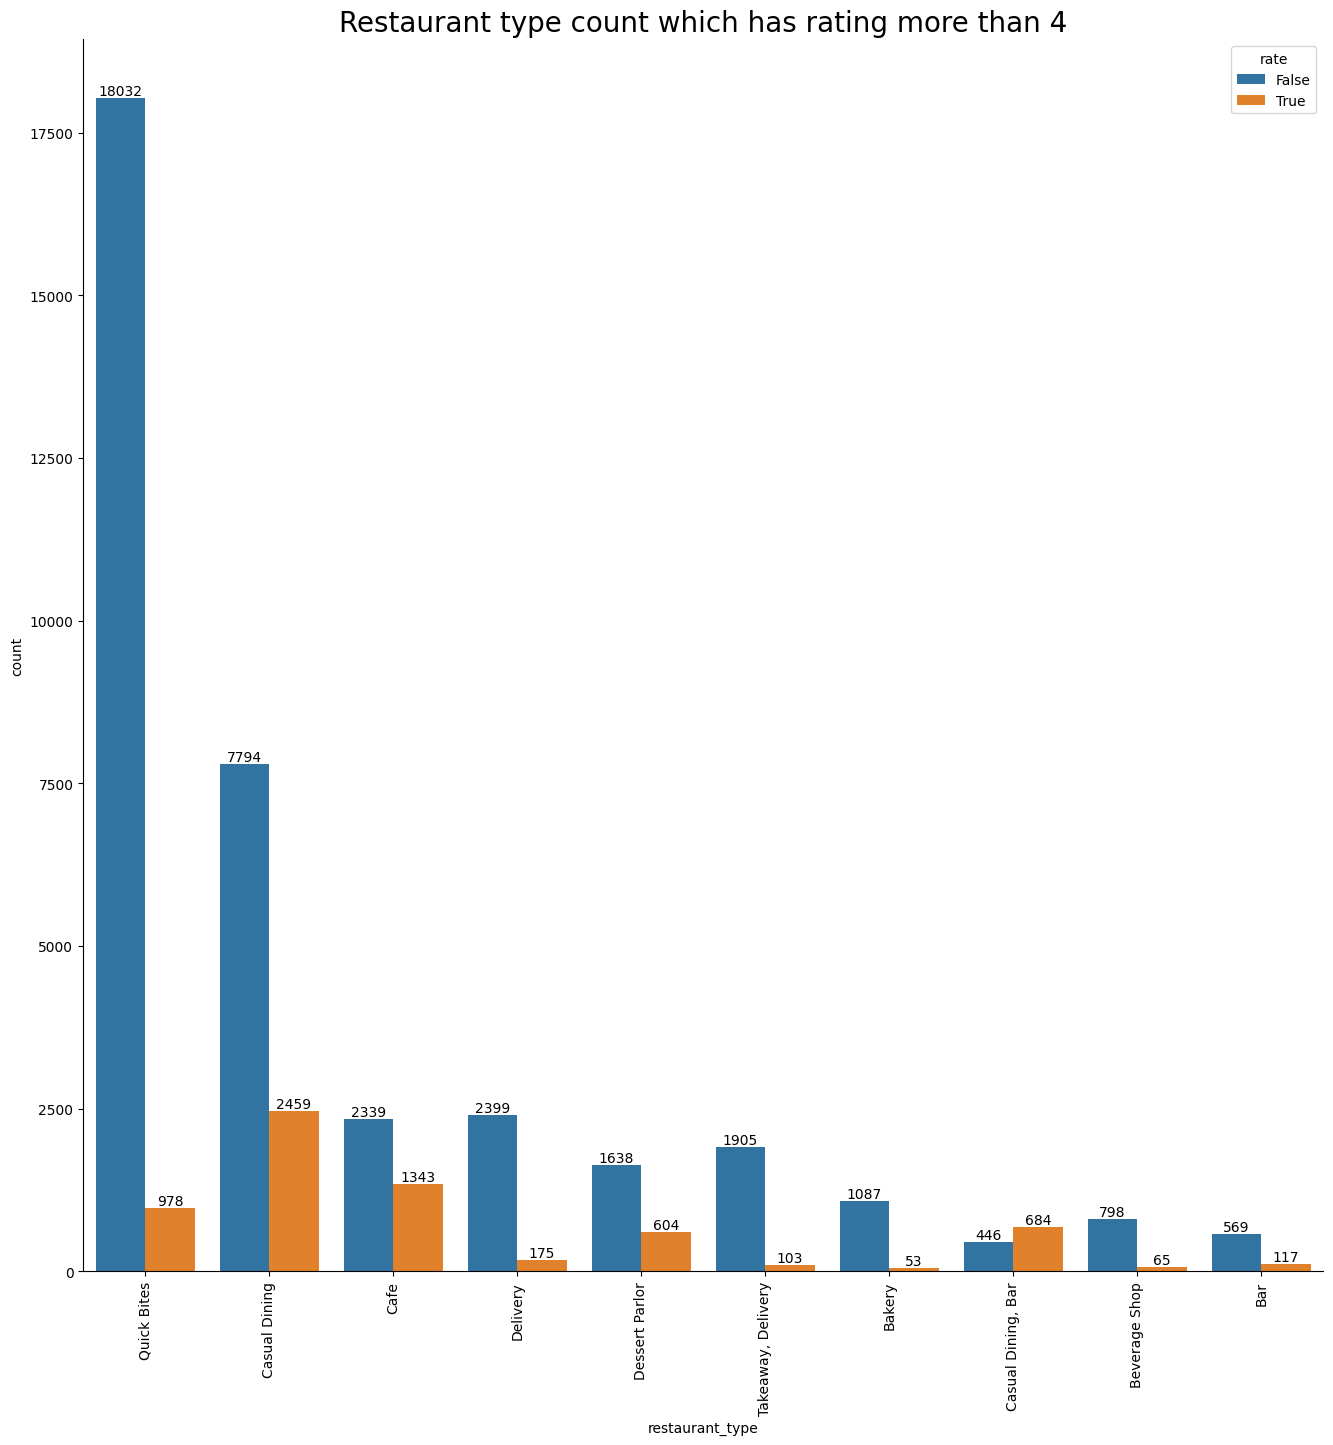

In [50]:
plt.figure(figsize=(16,16))
loc_rate=sns.countplot(x=(df['restaurant_type']),hue=(df['rate']>4),order=df['restaurant_type'].value_counts(ascending=False).index[:10])
loc_rate.bar_label(loc_rate.containers[0])
loc_rate.bar_label(loc_rate.containers[1])
plt.title('Restaurant type count which has rating more than 4',fontsize=20)
plt.xticks(rotation=90)
sns.despine()

#### From the above graph, it is observed that restaurant_type-casual dining has more ratings above 4 

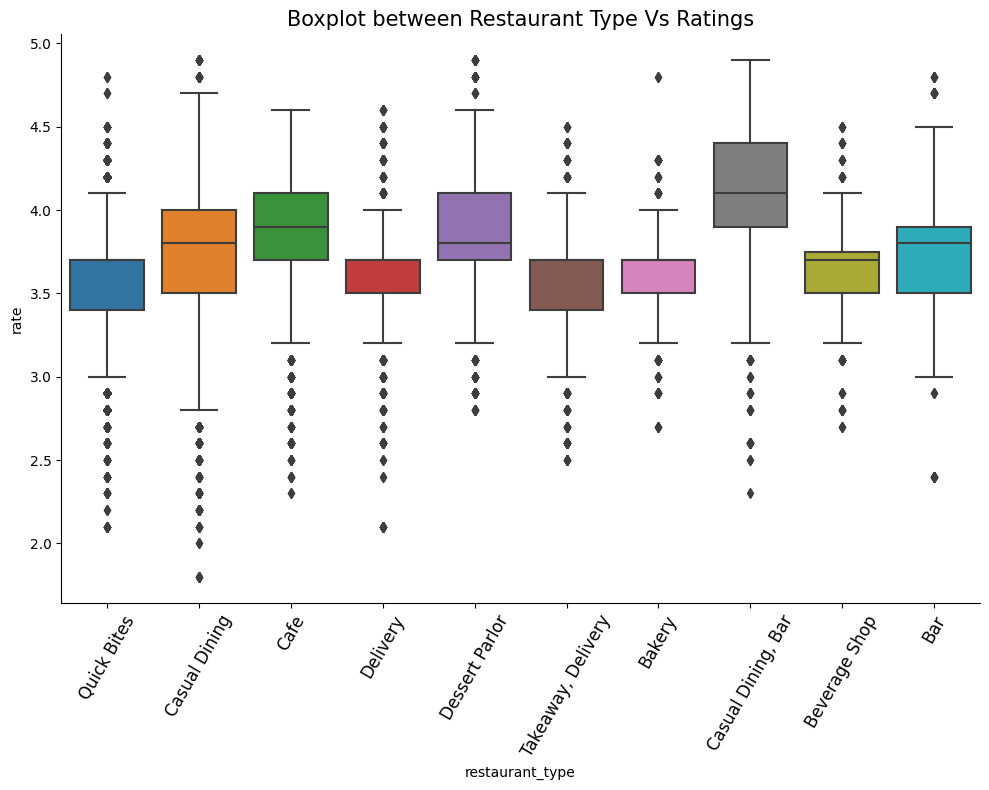

In [51]:
plt.figure(figsize=(10,8))
sns.boxplot(x='restaurant_type',y='rate',data=df,order=df['restaurant_type'].value_counts(ascending=False).index[:10])
plt.title('Boxplot between Restaurant Type Vs Ratings',fontsize=15)
plt.xticks(rotation=60,fontsize=12)
plt.tight_layout()
sns.despine()

## Countplot for Types of services

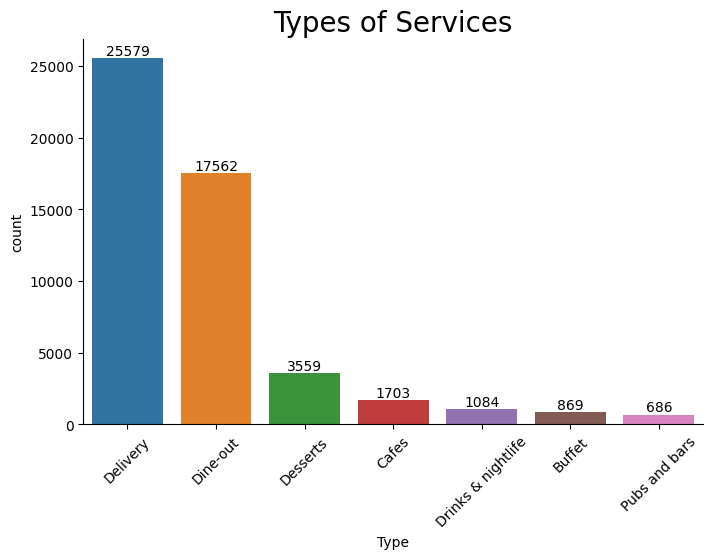

In [52]:
plt.figure(figsize=(8,5))
types=sns.countplot(x='Type',data=df,order=df['Type'].value_counts(ascending=False).index)
types.bar_label(types.containers[0])
plt.title('Types of Services',fontsize=20)
plt.xticks(rotation=45)
sns.despine()

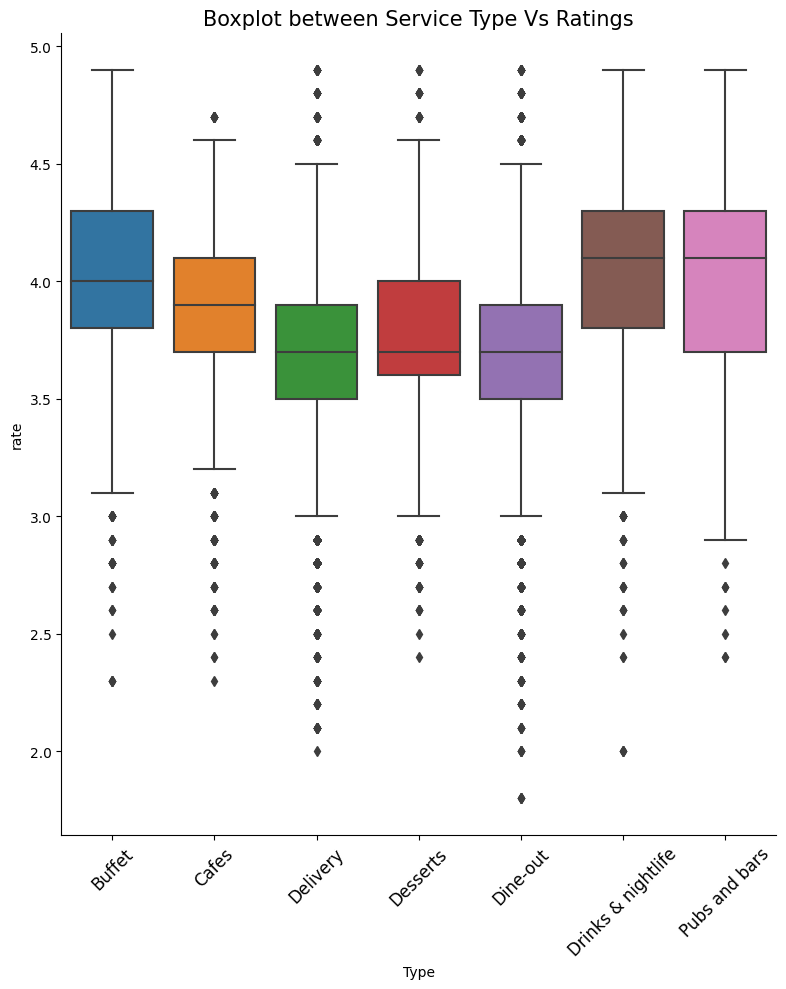

In [53]:
plt.figure(figsize=(8,10))
sns.boxplot(x='Type',y='rate',data=df)
plt.title('Boxplot between Service Type Vs Ratings',fontsize=15)
plt.xticks(rotation=45,fontsize=12)
plt.tight_layout()
sns.despine()

## From the above it is clear that services like Pubs & Bars, Drinks & Nightlife are getting higher ratings

In [54]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'restaurant_type', 'cuisines', 'Cost_2_persons', 'Type', 'city'],
      dtype='object')

### Cost Analysis

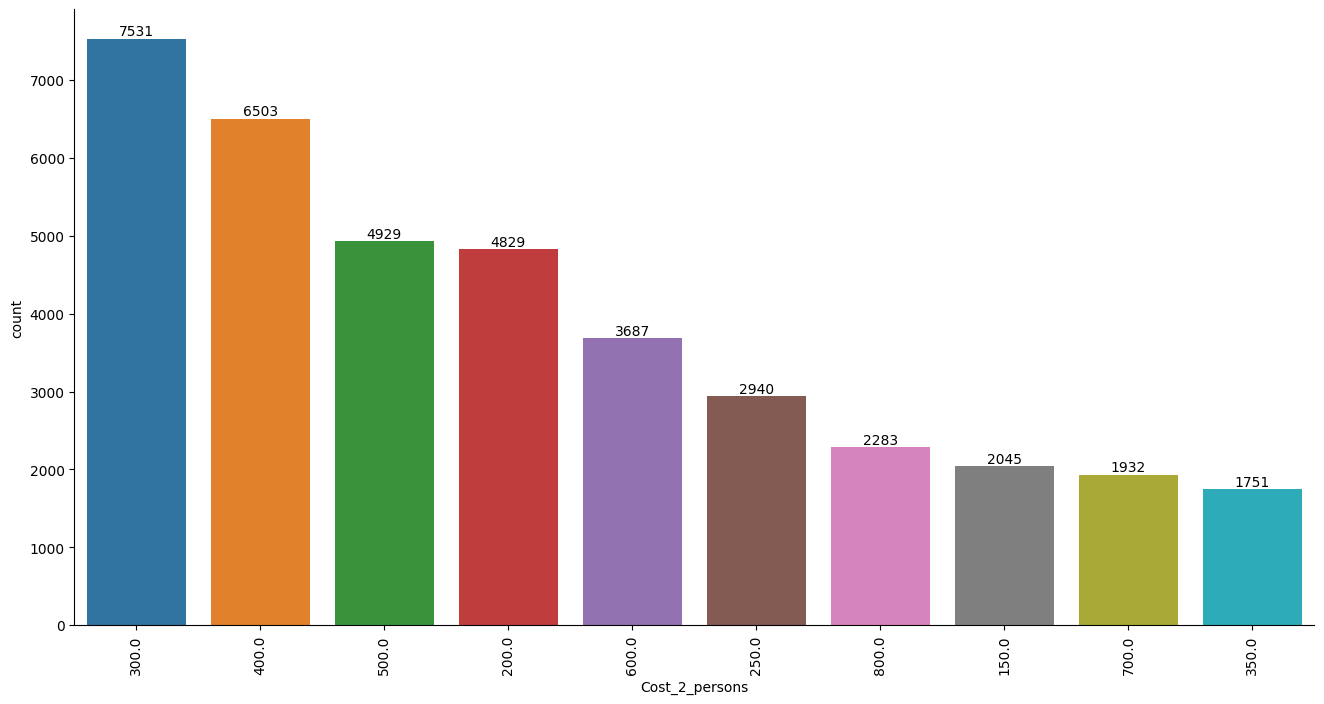

In [55]:
plt.figure(figsize=(16,8))
cost=sns.countplot(x='Cost_2_persons',data=df,order=df['Cost_2_persons'].value_counts(ascending=False).index[:10])
cost.bar_label(cost.containers[0])
plt.xticks(rotation=90)
sns.despine()

In [56]:
df_cost=df.groupby('location')['Cost_2_persons'].mean().sort_values(ascending=False)

In [57]:
df_cost=df_cost.round(2)

In [58]:
df_cost

location
Sankey Road         2505.56
Race Course Road    1309.35
Lavelle Road        1307.05
MG Road             1156.22
Infantry Road       1060.67
                     ...   
Ejipura              320.55
CV Raman Nagar       311.24
Yelahanka            310.00
City Market          302.43
Peenya               300.00
Name: Cost_2_persons, Length: 93, dtype: float64

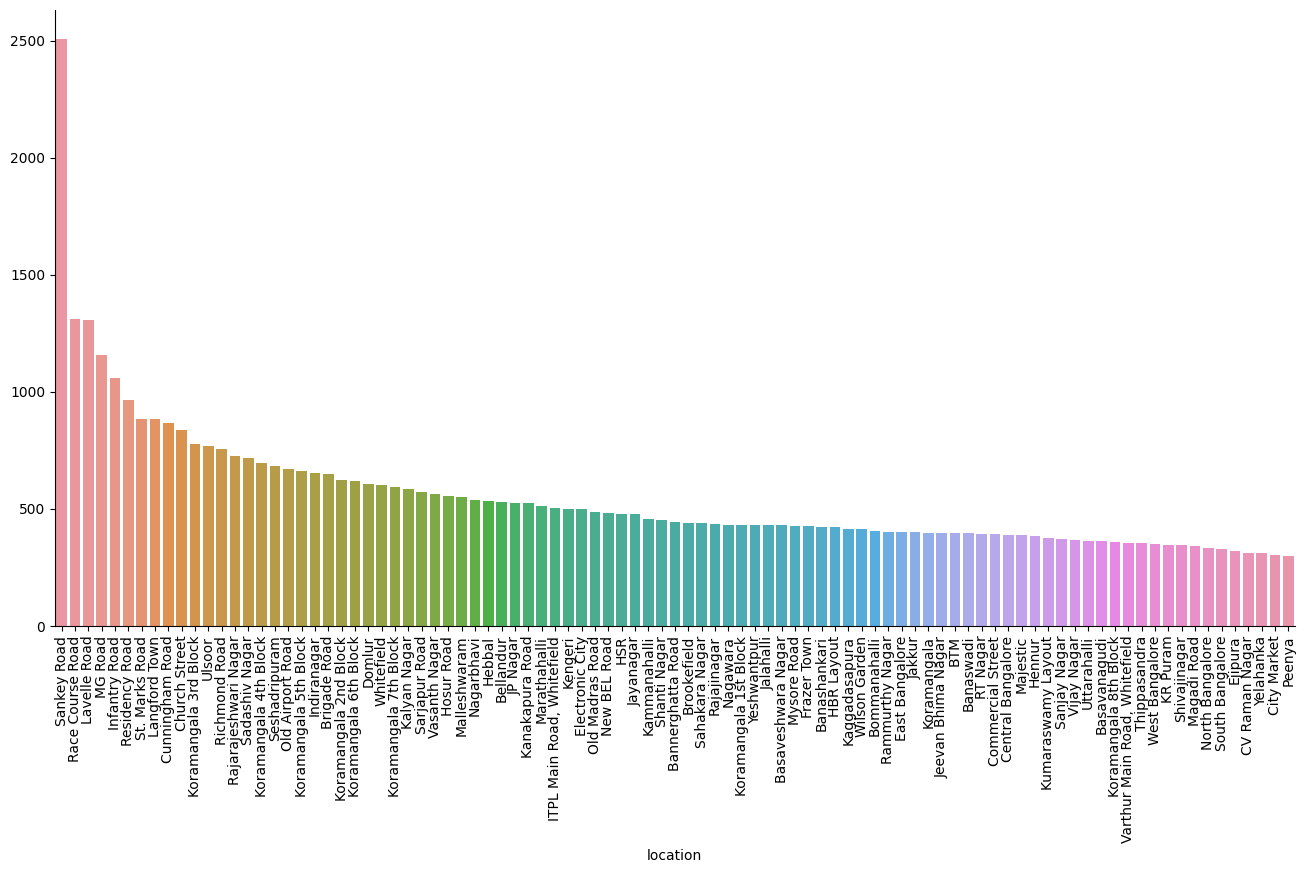

In [59]:
plt.figure(figsize=(16,8))
sns.barplot(x=df_cost.index,y=df_cost.values)
plt.xticks(rotation=90)
sns.despine()

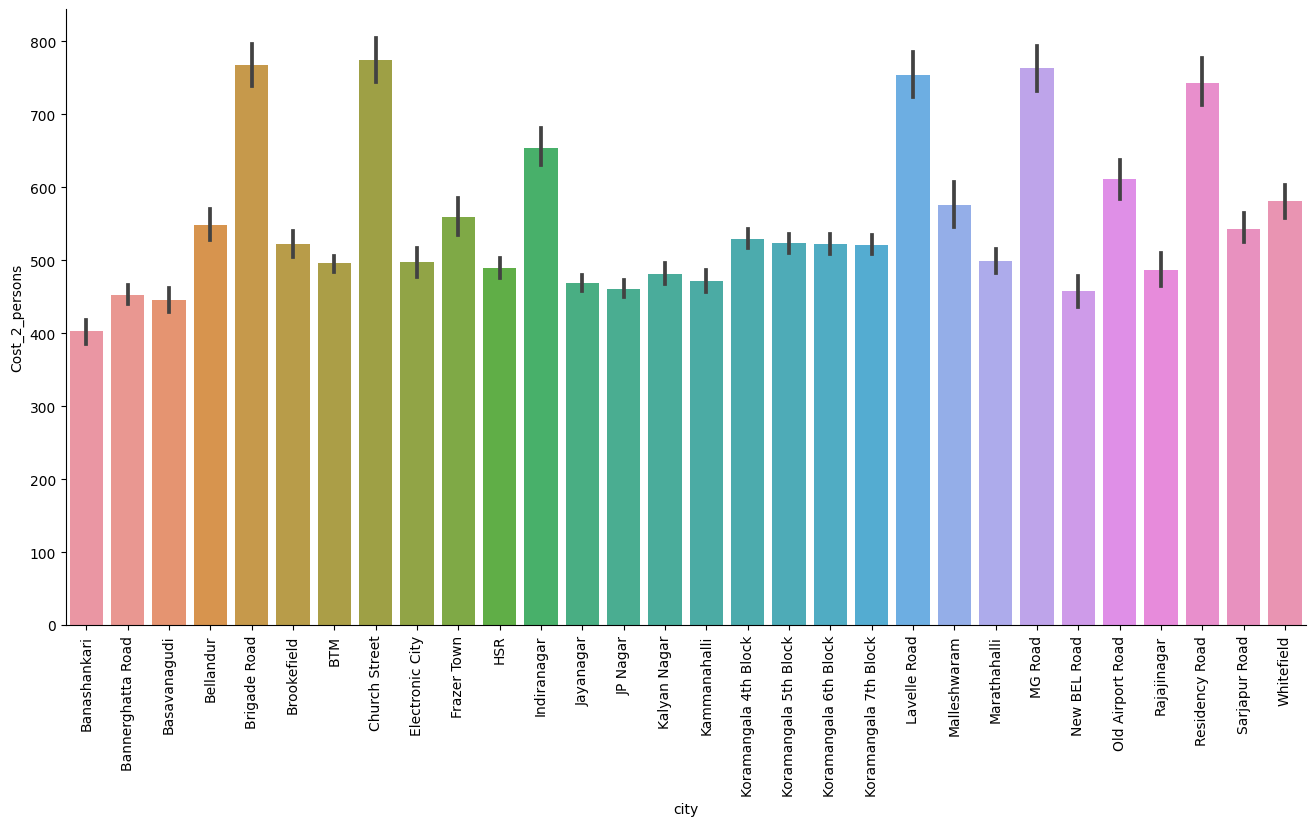

In [60]:
plt.figure(figsize=(16,8))
sns.barplot(x='city',y='Cost_2_persons',data=df)
plt.xticks(rotation=90)
sns.despine()

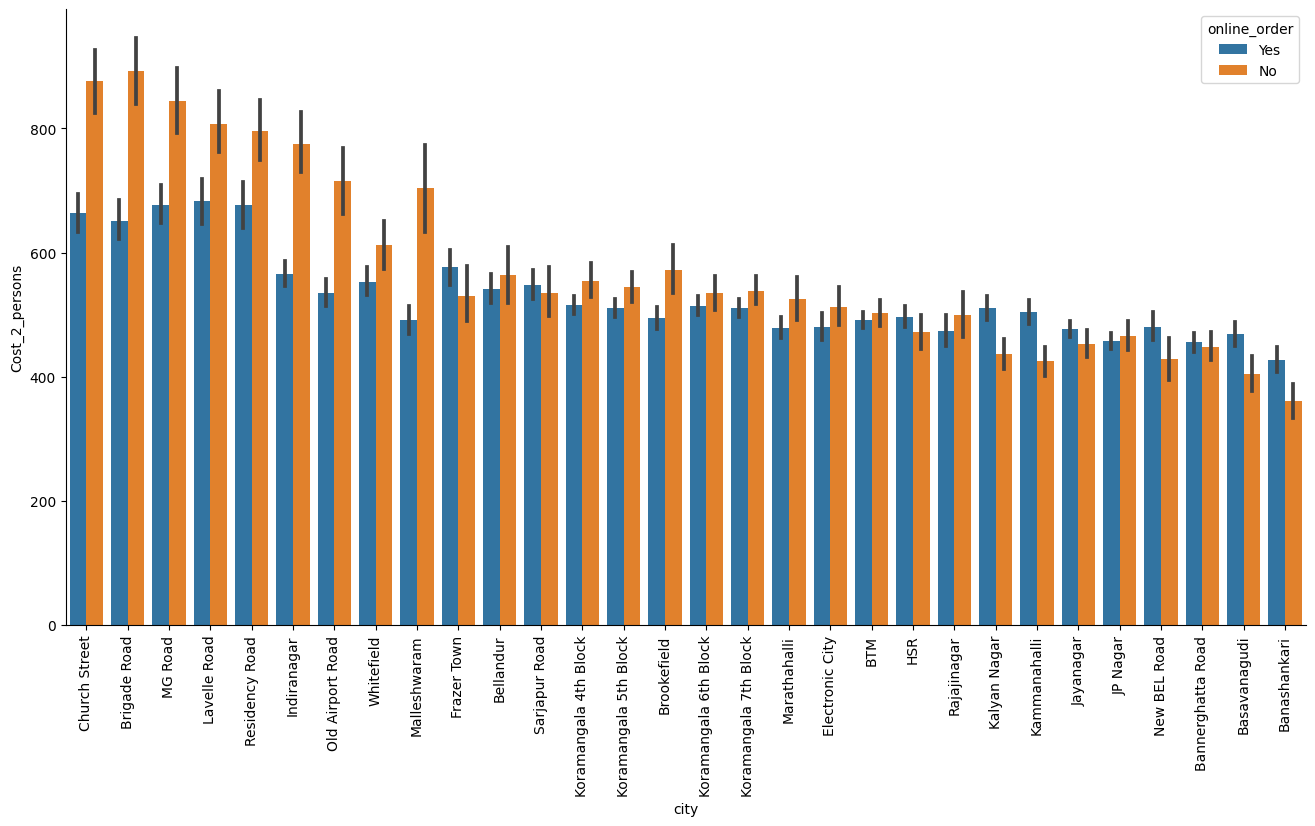

In [61]:
plt.figure(figsize=(16,8))
order=df.groupby('city')['Cost_2_persons'].mean().sort_values(ascending=False).index
city_cost=sns.barplot(x='city',y='Cost_2_persons',hue='online_order',data=df,order=order)
#city_cost.bar_label(city_cost.containers[0])
plt.xticks(rotation=90)
sns.despine()

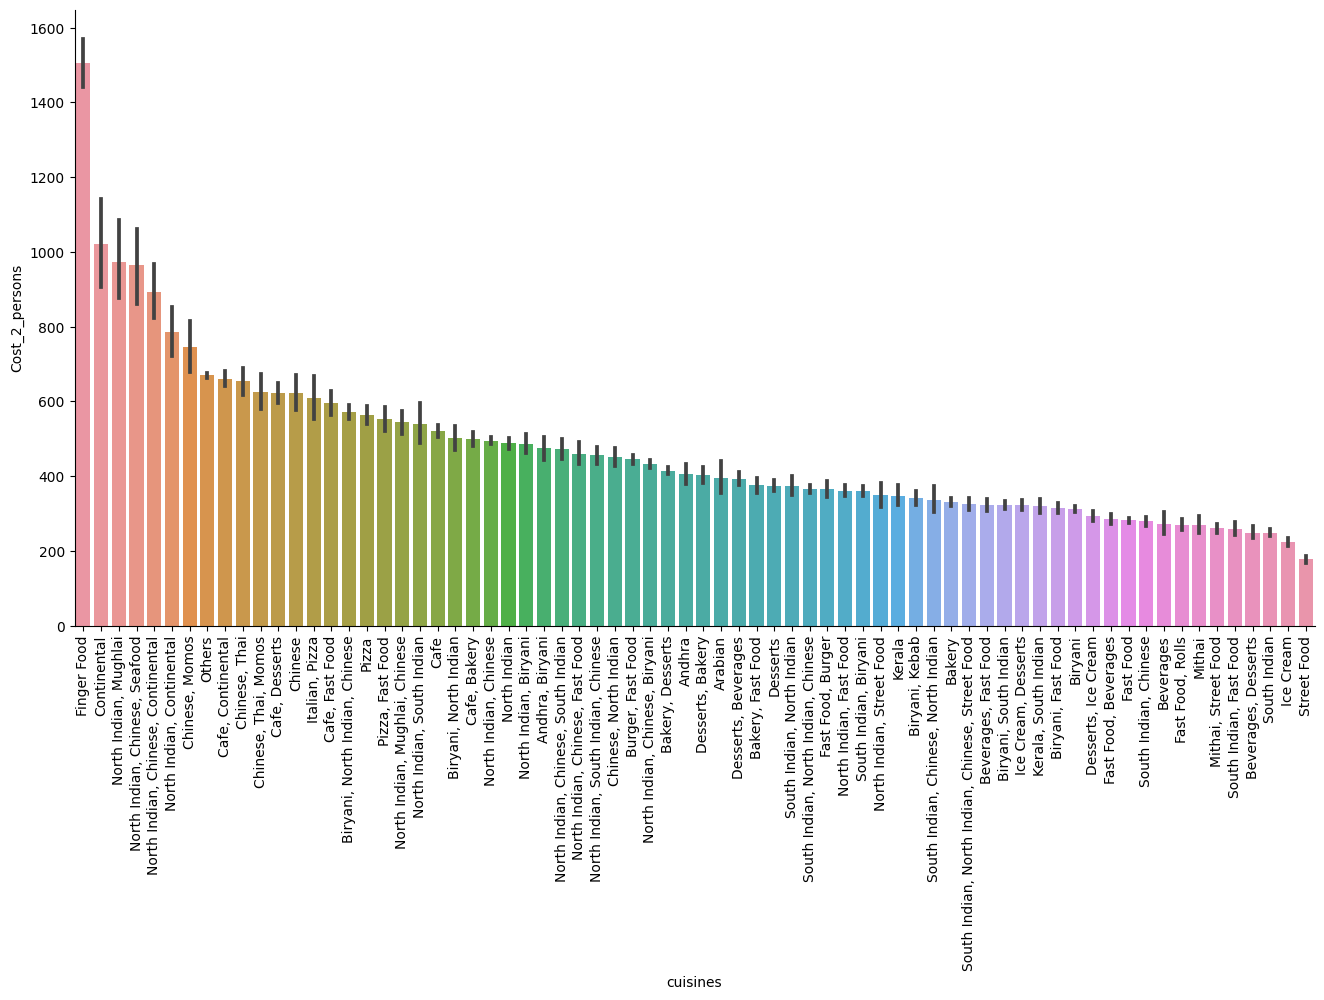

In [62]:
plt.figure(figsize=(16,8))
order=df.groupby('cuisines')['Cost_2_persons'].mean().sort_values(ascending=False).index
cui_cost=sns.barplot(x='cuisines',y='Cost_2_persons',data=df,order=order)
#cui_cost.bar_label(cui_cost.containers[0])
plt.xticks(rotation=90)
sns.despine()

In [63]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'restaurant_type', 'cuisines', 'Cost_2_persons', 'Type', 'city'],
      dtype='object')

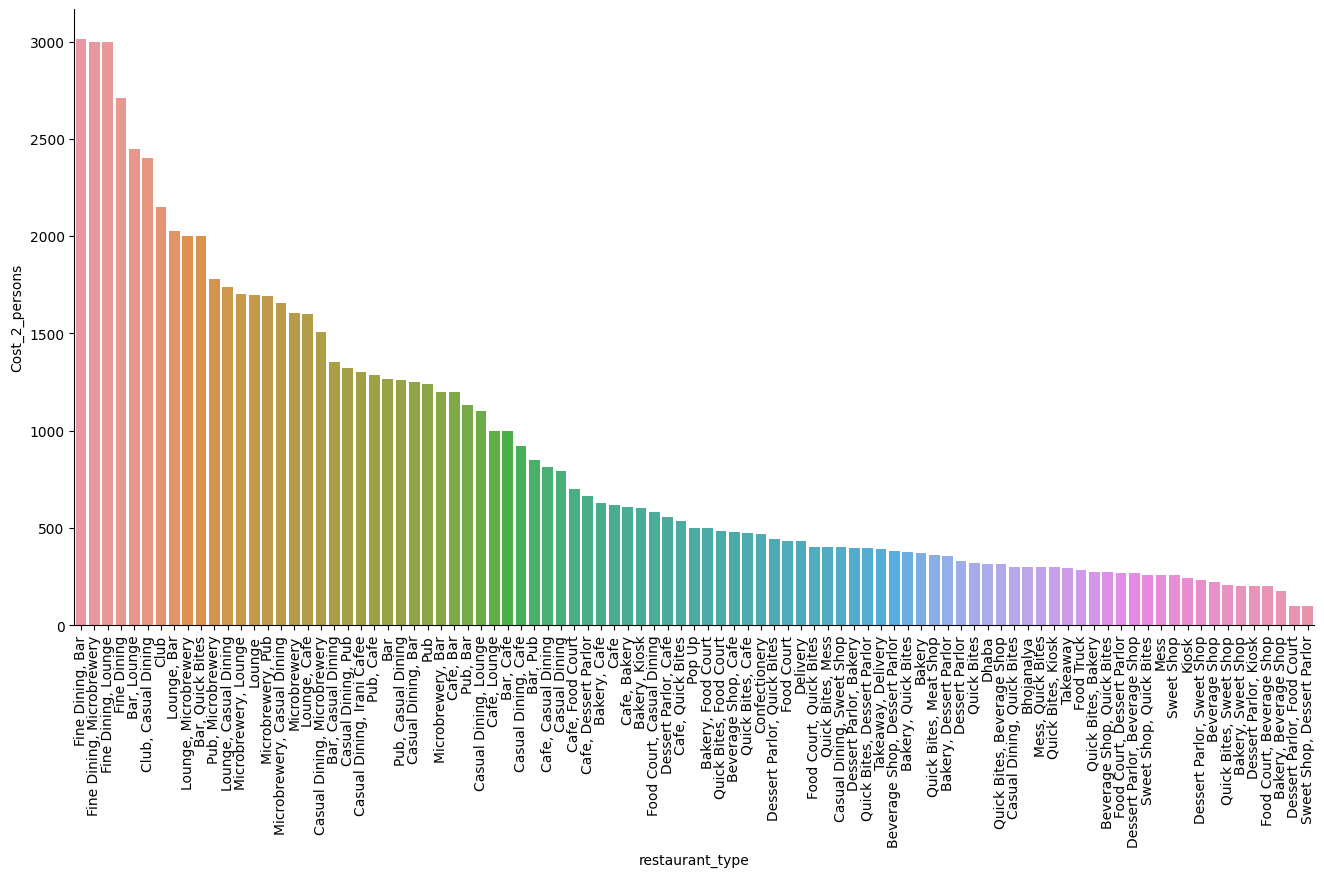

In [64]:
plt.figure(figsize=(16,8))
order=df.groupby('restaurant_type')['Cost_2_persons'].mean().sort_values(ascending=False).index
cui_cost=sns.barplot(x='restaurant_type',y='Cost_2_persons',data=df,order=order,errorbar=None)
#cui_cost.bar_label(cui_cost.containers[0])
plt.xticks(rotation=90)
sns.despine()

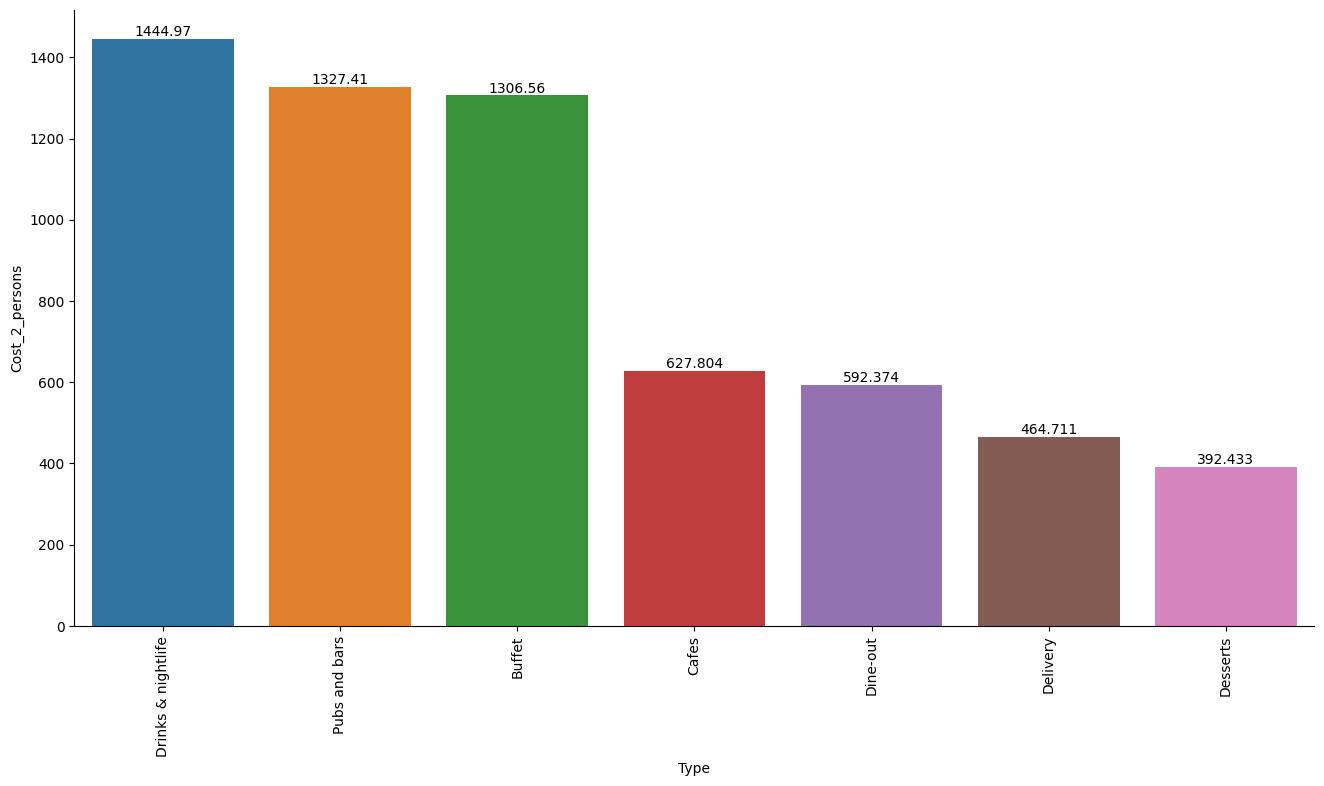

In [65]:
plt.figure(figsize=(16,8))
order=df.groupby('Type')['Cost_2_persons'].mean().sort_values(ascending=False).index
cui_cost=sns.barplot(x='Type',y='Cost_2_persons',data=df,order=order,errorbar=None)
cui_cost.bar_label(cui_cost.containers[0])
plt.xticks(rotation=90)
sns.despine()

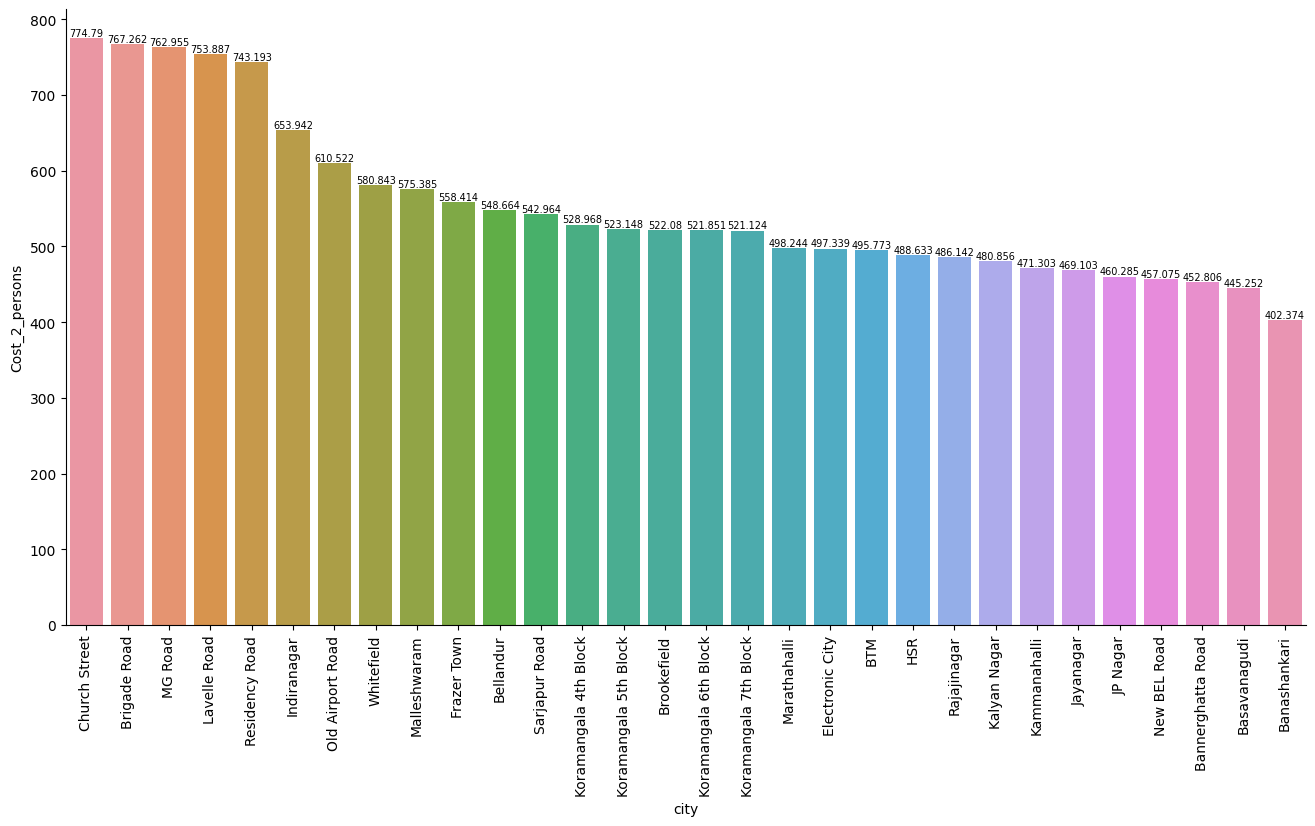

In [66]:
plt.figure(figsize=(16,8))
order=df.groupby('city')['Cost_2_persons'].mean().sort_values(ascending=False).index
cui_cost=sns.barplot(x='city',y='Cost_2_persons',data=df,order=order,errorbar=None)
cui_cost.bar_label(cui_cost.containers[0],fontsize=7)
plt.xticks(rotation=90)
sns.despine()

In [67]:
# Group by restaurant name and count the number of occurrences
res_chains = df.groupby('name').size().reset_index(name='counts')

# Sort by counts in descending order
res_chains = res_chains.sort_values(by='counts', ascending=False)

# Print the top 10 most famous restaurant chains
print(res_chains.head(10))


                   name  counts
1313    Cafe Coffee Day      96
5509             Onesta      85
3762          Just Bake      73
2428  Empire Restaurant      71
2558  Five Star Chicken      70
3932       Kanti Sweets      68
5747              Petoo      66
5796         Polar Bear      65
821      Baskin Robbins      64
5773          Pizza Hut      62


In [68]:
res_chains

,name,counts
1313,Cafe Coffee Day,96
5509,Onesta,85
3762,Just Bake,73
2428,Empire Restaurant,71
2558,Five Star Chicken,70
...,...,...
4804,Milkacium,1
6773,Siddu Samayal,1
2595,Food And Biryani (FAB),1
7741,The Chinese Table,1


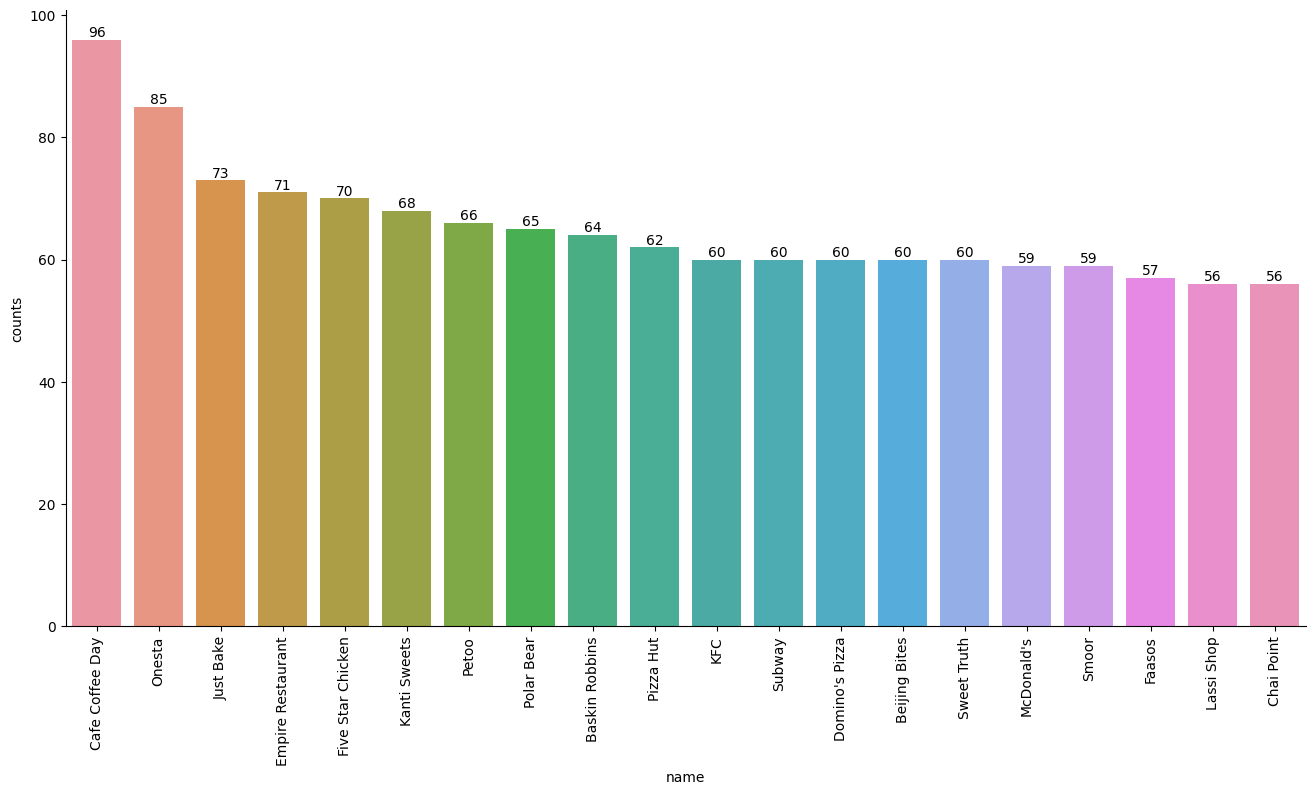

In [69]:
plt.figure(figsize=(16,8))
r_chains=sns.barplot(x='name',y='counts',data=res_chains.head(20),errorbar=None)
r_chains.bar_label(r_chains.containers[0])
plt.xticks(rotation=90)
sns.despine()

In [70]:
df

,name,online_order,book_table,rate,votes,location,restaurant_type,cuisines,Cost_2_persons,Type,city
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,Others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining",Others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,Others,600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51037,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield
51038,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,Whitefield
51039,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars,Whitefield
51040,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars,Whitefield


<Figure size 1000x1000 with 0 Axes>

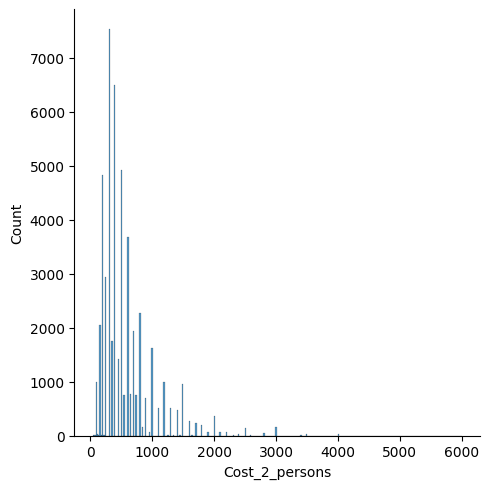

In [71]:
# Distribution of votes
plt.figure(figsize=(10,10))
sns.displot(df['Cost_2_persons'])
plt.show()

<Axes: xlabel='rate', ylabel='Density'>

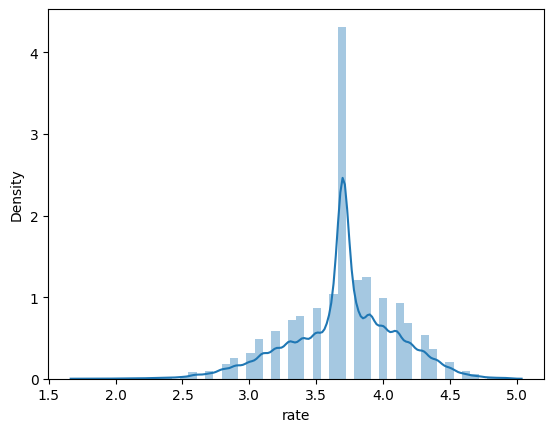

In [72]:
sns.distplot(df['rate'])

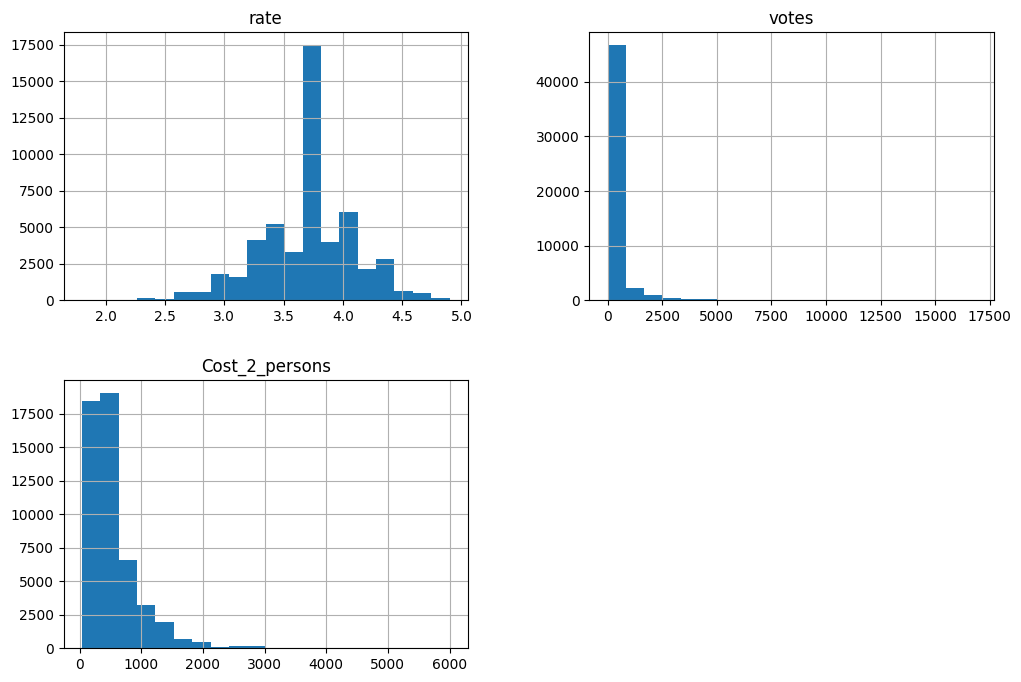

In [73]:
df.hist(figsize=(12,8),bins=20)
plt.show()

# Data Preprocessing
## Conversion of Categorical data to Numerical data

In [74]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'restaurant_type', 'cuisines', 'Cost_2_persons', 'Type', 'city'],
      dtype='object')

#### Selecting required columns for applying ML Algorithm

In [75]:
df_zomato=df.filter(['online_order','book_table','votes','restaurant_type','cuisines','city','Cost_2_persons','rate'],axis=1)

In [76]:
df_zomato

,online_order,book_table,votes,restaurant_type,cuisines,city,Cost_2_persons,rate
0,Yes,Yes,775,Casual Dining,"North Indian, Mughlai, Chinese",Banashankari,800.0,4.100000
1,Yes,No,787,Casual Dining,Others,Banashankari,800.0,4.100000
2,Yes,No,918,"Cafe, Casual Dining",Others,Banashankari,800.0,3.800000
3,No,No,88,Quick Bites,"South Indian, North Indian",Banashankari,300.0,3.700000
4,No,No,166,Casual Dining,Others,Banashankari,600.0,3.800000
...,...,...,...,...,...,...,...,...
51037,No,No,27,Bar,Continental,Whitefield,1500.0,3.600000
51038,No,No,0,Bar,Finger Food,Whitefield,600.0,3.700142
51039,No,No,0,Bar,Finger Food,Whitefield,2000.0,3.700142
51040,No,Yes,236,Bar,Finger Food,Whitefield,2500.0,4.300000


#### Label Encoding

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [78]:
features=['online_order','book_table','votes','restaurant_type','cuisines','city']
for i in features:
    df_zomato[i]=le.fit_transform(df_zomato[i])

In [79]:
df_zomato

,online_order,book_table,votes,restaurant_type,cuisines,city,Cost_2_persons,rate
0,1,1,767,27,54,1,800.0,4.100000
1,1,0,778,27,58,1,800.0,4.100000
2,1,0,887,22,58,1,800.0,3.800000
3,0,0,87,78,66,1,300.0,3.700000
4,0,0,165,27,58,1,600.0,3.800000
...,...,...,...,...,...,...,...,...
51037,0,0,26,8,26,29,1500.0,3.600000
51038,0,0,0,8,35,29,600.0,3.700142
51039,0,0,0,8,35,29,2000.0,3.700142
51040,0,1,235,8,35,29,2500.0,4.300000


#### Feature Scaling

In [80]:
df_zomato.shape

(51042, 8)

In [81]:
df_zomato.dropna(how='any',inplace=True)

In [82]:
df_zomato.shape

(51042, 8)

In [83]:
feature=df_zomato.drop(['rate'],axis=1)

In [84]:
feature

,online_order,book_table,votes,restaurant_type,cuisines,city,Cost_2_persons
0,1,1,767,27,54,1,800.0
1,1,0,778,27,58,1,800.0
2,1,0,887,22,58,1,800.0
3,0,0,87,78,66,1,300.0
4,0,0,165,27,58,1,600.0
...,...,...,...,...,...,...,...
51037,0,0,26,8,26,29,1500.0
51038,0,0,0,8,35,29,600.0
51039,0,0,0,8,35,29,2000.0
51040,0,1,235,8,35,29,2500.0


#### Feature Scaling 

In [85]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()

In [86]:
feature=std_scale.fit(feature).transform(feature)

In [87]:
feature

array([[ 0.82979931,  2.63731377,  1.3000526 , ...,  0.38897437,
        -1.59158143,  0.55593698],
       [ 0.82979931, -0.37917369,  1.32612699, ...,  0.61682543,
        -1.59158143,  0.55593698],
       [ 0.82979931, -0.37917369,  1.58450051, ...,  0.61682543,
        -1.59158143,  0.55593698],
       ...,
       [-1.20511067, -0.37917369, -0.51804359, ..., -0.69331816,
         1.78833001,  3.28762368],
       [-1.20511067,  2.63731377,  0.03900022, ..., -0.69331816,
         1.78833001,  4.42582647],
       [-1.20511067, -0.37917369, -0.4895988 , ...,  0.61682543,
         1.78833001,  2.14942089]])

In [88]:
# Selecting label
df_zomato['rate']=df_zomato['rate'].round(1)
label=df_zomato['rate'].values

In [89]:
label

array([4.1, 4.1, 3.8, ..., 3.7, 4.3, 3.4])

### Splitting Train & Test Data

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,label,test_size=0.30,random_state=40)


In [91]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((35729, 7), (15313, 7), (35729,), (15313,))

# Regression Models

Some popular examples of supervised machine learning algorithms for regression problems are:

- Linear regression
- Random forest
- Support vector machines

### 1. Linear Regression Model

In [92]:
from sklearn.linear_model import LinearRegression
li_reg=LinearRegression()

In [93]:
# Training the model using X_train
li_reg.fit(X_train,y_train)

LinearRegression()

In [94]:
# Model Score with train data
print(li_reg.score(X_train,y_train))

0.31663057641585624


In [95]:
# Model Score with test data
li_reg.score(X_test,y_test)

0.3081416471406069

In [96]:
# Prediction
lireg_predict=li_reg.predict(X_test).round(1)

In [97]:
lireg_predict

array([3.6, 3.6, 4. , ..., 3.6, 3.6, 3.5])

In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [99]:
print('R^2 Score:',(r2_score(y_test,lireg_predict)*100).round(2))
print('Mean Squared Error (MSE):',(mean_squared_error(y_test,lireg_predict)*100).round(2))
print('Mean Absolute Error (MAE):',(mean_absolute_error(y_test,lireg_predict)*100).round(2))

R^2 Score: 30.12
Mean Squared Error (MSE): 10.94
Mean Absolute Error (MAE): 24.67


In [100]:
# Evaluating Variance
Variance=np.var(lireg_predict)
Variance

0.04875210122187546

In [101]:
# Evaluating Bias
# Bias=SSE-Variance
# Calculating SSE
SSE=np.mean((np.mean(lireg_predict)-label)**2)
SSE


0.1561855609366818

In [102]:
Bias=SSE-Variance
Bias

0.10743345971480633

- If the variance is 0.04875 and the bias is 0.10743, it means that the model is underfitting the data.
- This is because the bias is high and the variance is low. A high bias means that the model is not complex enough to capture the underlying patterns in the data, while a low variance means that the model is not sensitive enough to changes in the data .

In [103]:
bi=(mean_squared_error(y_test,lireg_predict)-(Variance**2))**0.5
bi

0.3270689697374523

### 2. Random Forest Regression

In [104]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()

In [105]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [106]:
print('R^2 Score for RFR with Train Data:',(RF.score(X_train,y_train)*100).round(2))
print('R^2 Score for RFR with Test Data:',(RF.score(X_test,y_test)*100).round(2))

R^2 Score for RFR with Train Data: 97.51
R^2 Score for RFR with Test Data: 85.14


In [107]:
RF_Predict=RF.predict(X_test)

In [108]:
RF_Predict.round(1)

array([3.4, 3.5, 3.9, ..., 3.9, 3.6, 3.7])

In [109]:
print('Accuracy score for RFR:',r2_score(y_test,RF_Predict)*100)

Accuracy score for RFR: 85.13760680485211


In [110]:
print('Mean Squared Error (MSE) for RFR:',(mean_squared_error(y_test,RF_Predict)*100))


Mean Squared Error (MSE) for RFR: 2.325630172443131


In [111]:
RF_variance=np.var(RF_Predict)

In [112]:
RF_variance

0.12138832179104572

In [113]:
RF_Bias=(mean_squared_error(y_test,RF_Predict) - (RF_variance**2))**0.5

In [114]:
RF_Bias

0.09231022184560518

- If the bias is low and the variance is high, it means that the model is overfitting . 
- This is because the bias is low and the variance is high. 
- In other words, the model is too complex and is fitting to the noise in the data instead of the underlying patterns.

### 3. Support Vector Regression

In [115]:
from sklearn.svm import SVR

In [116]:
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [117]:
print('SVR Score for Train Data:',svr.score(X_train,y_train))
print('SVR Score for Test Data:',svr.score(X_test,y_test))


SVR Score for Train Data: 0.376014780250721
SVR Score for Test Data: 0.36150974879888687


In [118]:
# Prediction
sv_predict=svr.predict(X_test)


In [119]:
# Accuracy Score
print('Accuracy Score for SVR Prediction:',r2_score(y_test,sv_predict)*100)

Accuracy Score for SVR Prediction: 36.150974879888686


In [122]:
# Using Random Forest Regressor to predict ratings
RF.predict([[0,0,700,20,50,20,500]])


array([4.731])

In [123]:
#Comparing Actual Vs Predicted ratings in RFR
compare=pd.DataFrame({'Actual Rating':y_test,'Predicted Rating':RF_Predict.round(1)})

In [124]:
compare.sample(20)

,Actual Rating,Predicted Rating
5309,3.9,3.9
4350,2.8,3.3
12271,3.4,3.4
12057,3.4,3.4
7975,3.8,3.8
10235,4.2,3.8
10093,4.0,4.0
2072,3.3,3.3
176,3.5,3.5
12229,3.7,3.7


In [125]:
RF_Predict.shape

(15313,)

### 4. Extra Tree Regressor

In [126]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(n_estimators=100)
etr.fit(X_train,y_train)

ExtraTreesRegressor()

In [127]:
print('ETR Score for Train Data:',etr.score(X_train,y_train))
print('ETR Score for Test Data:',etr.score(X_test,y_test))


ETR Score for Train Data: 0.9969168245832246
ETR Score for Test Data: 0.8849979558137717


In [128]:
ET_Predict=etr.predict(X_test)

In [129]:
ET_Predict

array([3.39, 3.5 , 4.  , ..., 3.9 , 3.7 , 3.7 ])

In [131]:
# Using Random Forest Regressor to predict ratings
etr.predict([[0,0,700,20,50,20,500]]).round(1)

array([4.6])

In [132]:
ETR_compare=pd.DataFrame({'Actual Rating':y_test,'ETR Predicted Rating':ET_Predict.round(1)})


In [149]:
ETR_compare.sample(10)

,Actual Rating,ETR Predicted Rating
3192,4.4,4.4
10473,3.7,3.7
12512,3.7,3.7
15119,3.7,3.7
2104,3.5,3.5
783,3.6,3.6
15211,3.7,3.7
8160,3.2,3.2
4451,3.6,3.7
12388,3.0,3.0


In [148]:
print('Accuracy Score Linear Reg:',(r2_score(y_test,lireg_predict)*100).round(2))
print('Accuracy score for Random Forest Reg:',(r2_score(y_test,RF_Predict)*100).round(2))
print('Accuracy Score for Support Vector Reg:',(r2_score(y_test,sv_predict)*100).round(2))
print('Accuracy score for Extra Trees Reg:',(r2_score(y_test,ET_Predict)*100).round(2))


Accuracy Score Linear Reg: 30.12
Accuracy score for Random Forest Reg: 85.14
Accuracy Score for Support Vector Reg: 36.15
Accuracy score for Extra Trees Reg: 88.5


## From  the above accuracy scores, it is clear that Extra Tree regressor gives best results.